In [1]:
import os
import sys
sys.path.append('/lmh_data/work/SEE/train/')
sys.path.append('/lmh_data/work/SEE/analyse/')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import ConvexHull
from statannotations.Annotator import Annotator

from analyse_util import figure_size, set_plt, set_Border
from velocity_util import read_pdb

In [2]:
def _draw(values, key):
    set_plt(figsize=(20, 10))
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots()

    min_values = 65536
    max_values = 0
    for cell_type in values.keys():
        plt.plot(
            list(range(1, len(values[cell_type][key])+1)), values[cell_type][key], label=cell_type,
            linewidth=figure_size['small'])
        min_values = min(min_values, min(values[cell_type][key]))
        max_values = max(max_values, max(values[cell_type][key]))

    set_Border(plt.gca())

    plt.xticks([i for i in range(1, 10)])
    plt.xlim((0, 10))
    plt.ylim((min_values*0.99, max_values*1.01))

    plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])
    plt.grid(False)
    
    plt.xlabel('pseudo-time', fontsize=figure_size['ultra'])
    plt.ylabel('value', fontsize=figure_size['ultra'])
    plt.title(key, fontsize=figure_size['ultra'])
    plt.legend(
        facecolor='white', loc='upper right', framealpha=0, handletextpad=1, borderpad=0, borderaxespad=0
    ).get_frame().set_linewidth(0.0)
    plt.show()

In [3]:
# def get_volumes(dir_path):
#     def calculate_volume(points):
#         return ConvexHull(points).volume

#     pseudo_times = [str(i) for i in range(1, 10)]
#     volumes = []

#     for pseudo_time in pseudo_times:
#         for root, _, files in os.walk('./{}/{}'.format(dir_path, pseudo_time)):
#             for file in files:
#                 if file.endswith('.pdb'):
#                     _pdb_path = os.path.join(root, file)
#                     volumes.append(calculate_volume(read_pdb(_pdb_path)))
#     return volumes

# from velocity_util import find_best_pdb
# def get_volumes(dir_path):
#     def calculate_volume(points):
#         return ConvexHull(points).volume

#     pseudo_times = [str(i) for i in range(1, 10)]
#     volumes = []

#     for pseudo_time in pseudo_times:
#         _pdb_path = find_best_pdb('./{}/{}'.format(dir_path, pseudo_time))
#         volumes.append(calculate_volume(read_pdb(_pdb_path)))
#     return volumes

from velocity_util import find_best_pdb
def get_volumes(dir_path):
    def calculate_volume(points):
        return ConvexHull(points).volume

    pseudo_times = [str(i) for i in range(1, 10)]
    volumes = []

    for pseudo_time in pseudo_times:
        _pdb_path = find_best_pdb('./{}/{}'.format(dir_path, pseudo_time))
        volumes.append(calculate_volume(read_pdb(_pdb_path)))
    return [volumes[i+1] - volumes[i] for i in range(len(volumes) - 1)]

# def get_volumes(dir_path):
#     def calculate_volume(points):
#         return ConvexHull(points).volume

#     pseudo_times = [str(i) for i in range(1, 10)]
#     volumes = dict()

#     for pseudo_time in pseudo_times:
#         volumes[pseudo_time] = []
#         for root, _, files in os.walk('./{}/{}'.format(dir_path, pseudo_time)):
#             for file in files:
#                 if file.endswith('.pdb'):
#                     _pdb_path = os.path.join(root, file)
#                     volumes[pseudo_time].append(calculate_volume(read_pdb(_pdb_path)))

#     result = []
#     for i in range(2, len(pseudo_times)):
#         for j in range(len(volumes[pseudo_times[0]])):
#             result.append(volumes[pseudo_times[i]][j]-volumes[pseudo_times[i-1]][j])
#     return result

# def get_volumes(dir_path):
#     def calculate_volume(points):
#         return ConvexHull(points).volume

#     pseudo_times = [str(i) for i in range(1, 10)]
#     volumes = dict()

#     for pseudo_time in pseudo_times:
#         volumes[pseudo_time] = []
#         for root, _, files in os.walk('./{}/{}'.format(dir_path, pseudo_time)):
#             for file in files:
#                 if file.endswith('.pdb'):
#                     _pdb_path = os.path.join(root, file)
#                     volumes[pseudo_time].append(calculate_volume(read_pdb(_pdb_path)))

#     result = []
#     for j in range(len(volumes[pseudo_times[0]])):
#         _result = []
#         for i in range(2, len(pseudo_times)):
#             _result.append(abs(volumes[pseudo_times[i]][j]-volumes[pseudo_times[i-1]][j]))
#         result.append(sum(_result))
#     return result

def box(data, x=None, y=None, hue=None, xticklabels=None, output_path: str = None):
    set_plt(figsize=(10, 10))
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots()

    ax = sns.histplot(data, kde=True)

    set_Border(plt.gca())
    plt.tick_params(
        colors="black", bottom=True, left=True, labelsize=figure_size["ultra"]
    )
#     plt.legend(
#         frameon=False,
#         markerscale=2,
#         borderpad=1,
#         borderaxespad=0,
#         fontsize=figure_size["middle"],
#         loc="lower right",
#     )
    plt.grid(False)

    if x:
        plt.xlabel(x, fontsize=figure_size["ultra"])
    if y:
        plt.ylabel(y, fontsize=figure_size["ultra"])
    if xticklabels:
        ax.set_xticklabels(labels=xticklabels)

    if output_path:
        plt.savefig(output_path, bbox_inches="tight")
    else:
        plt.show()

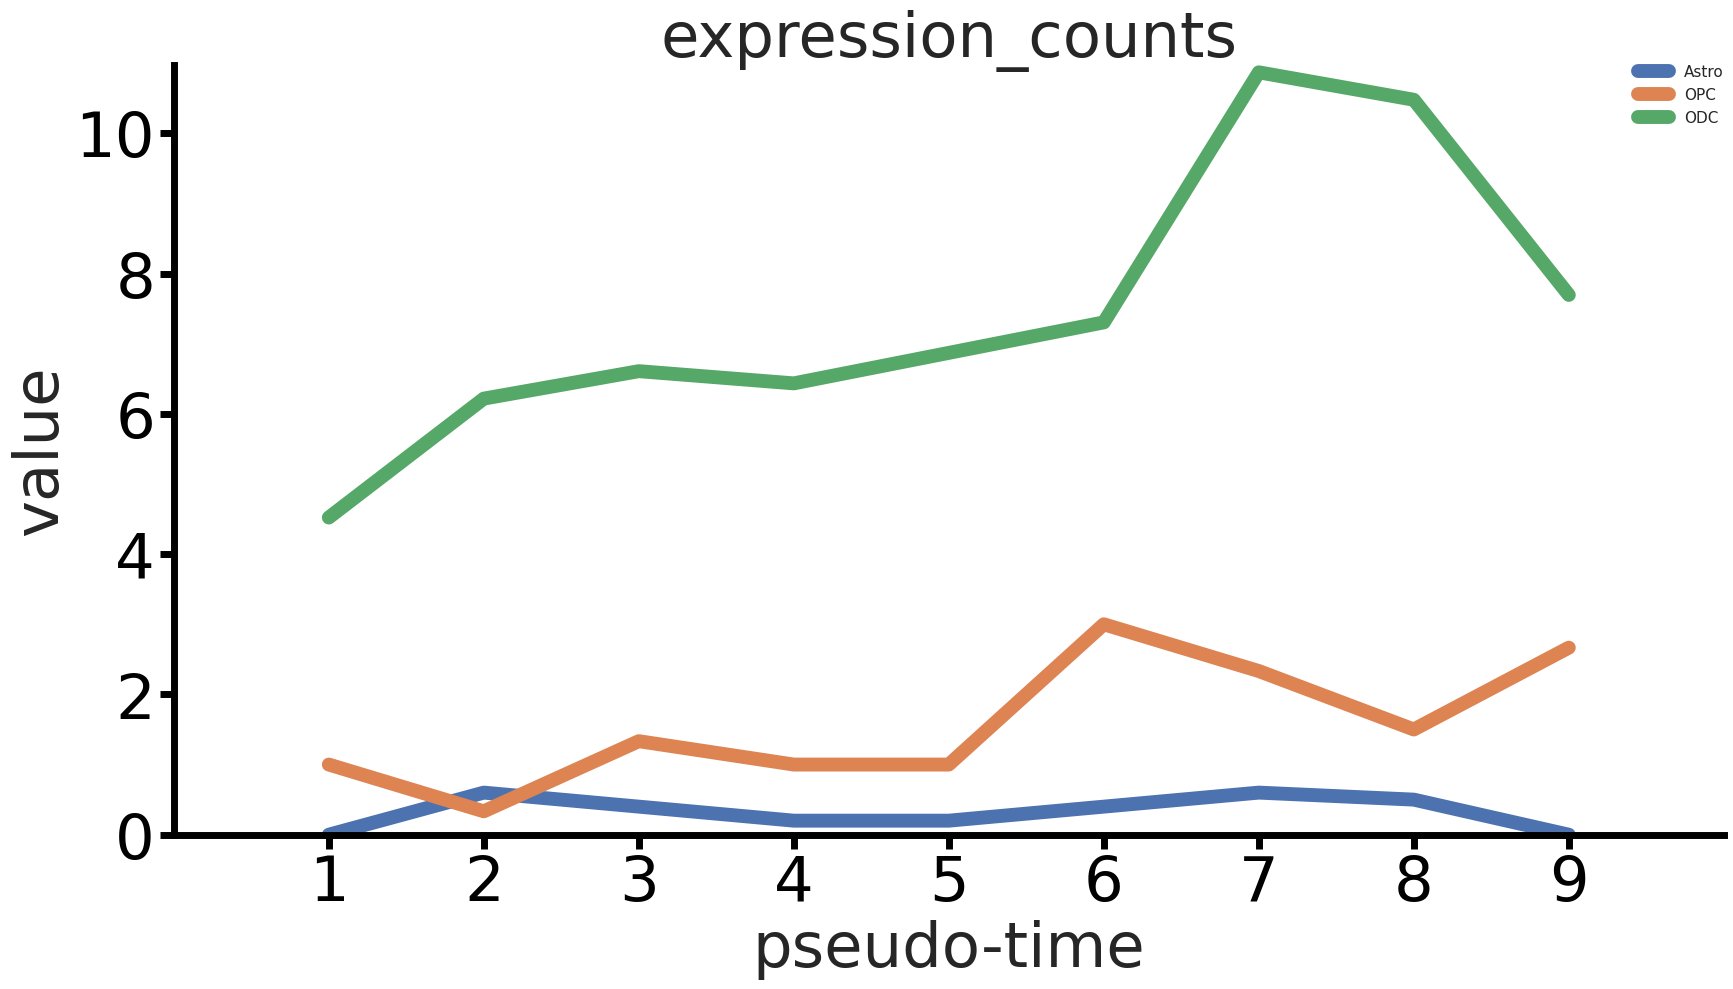

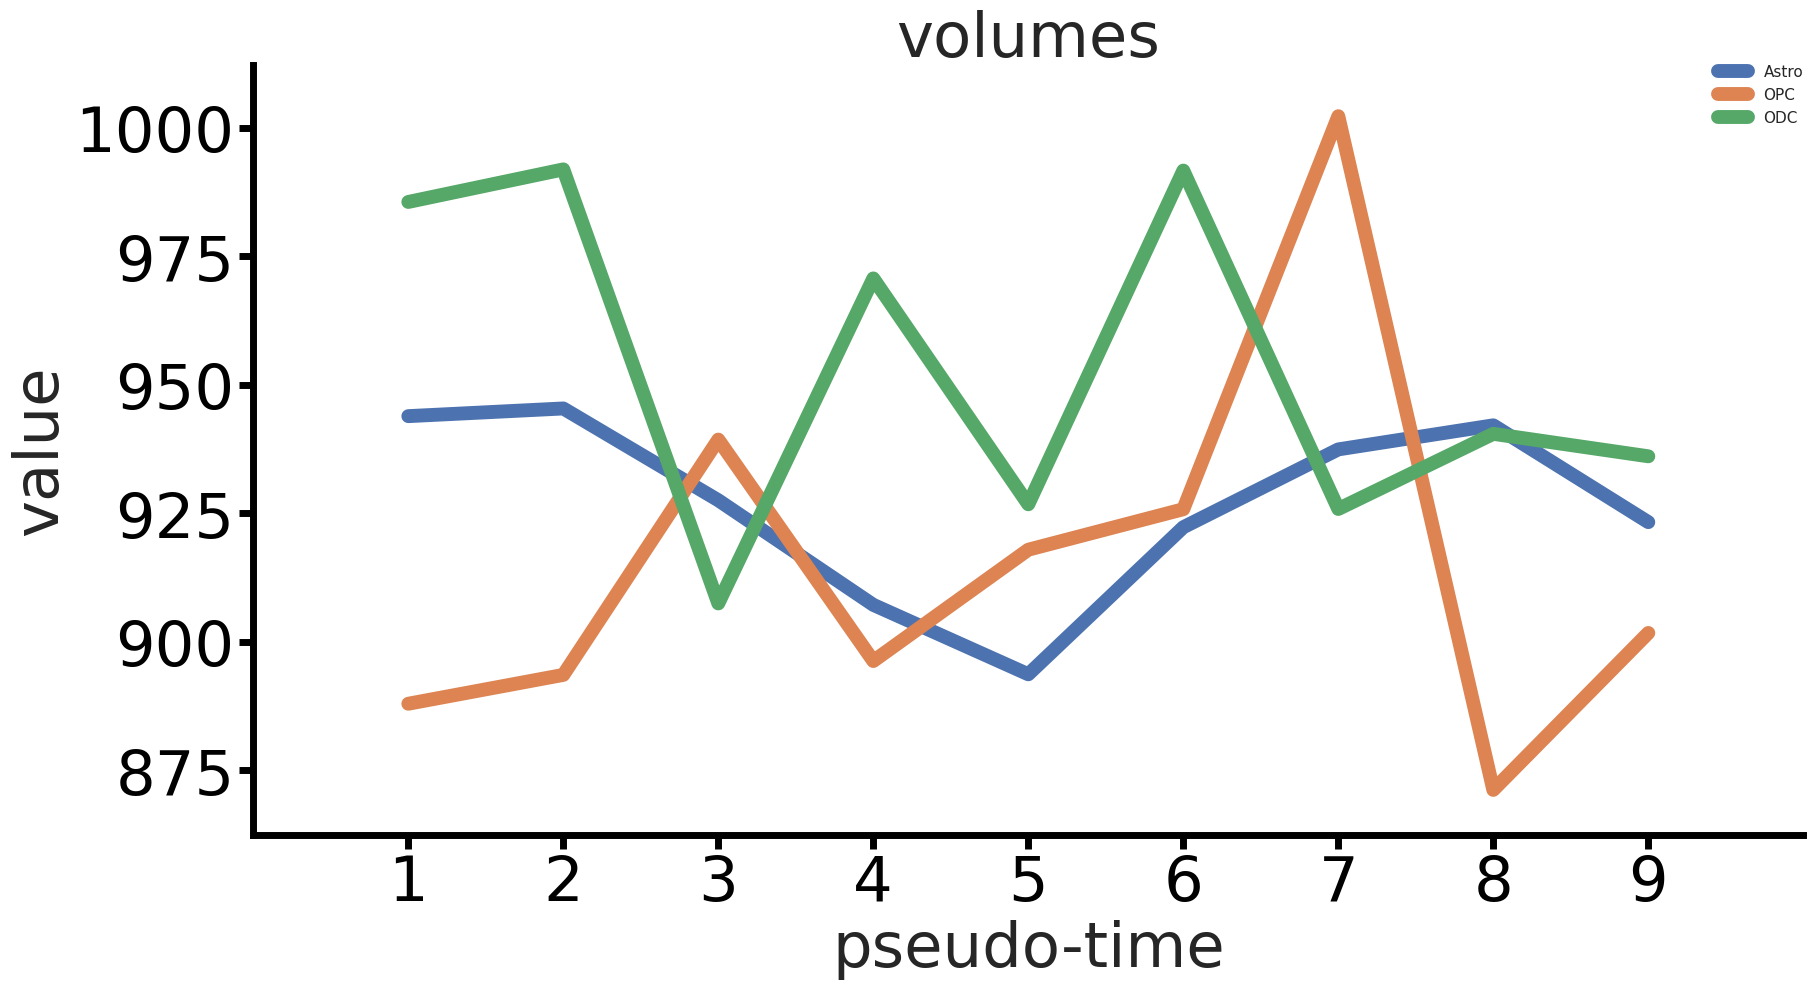

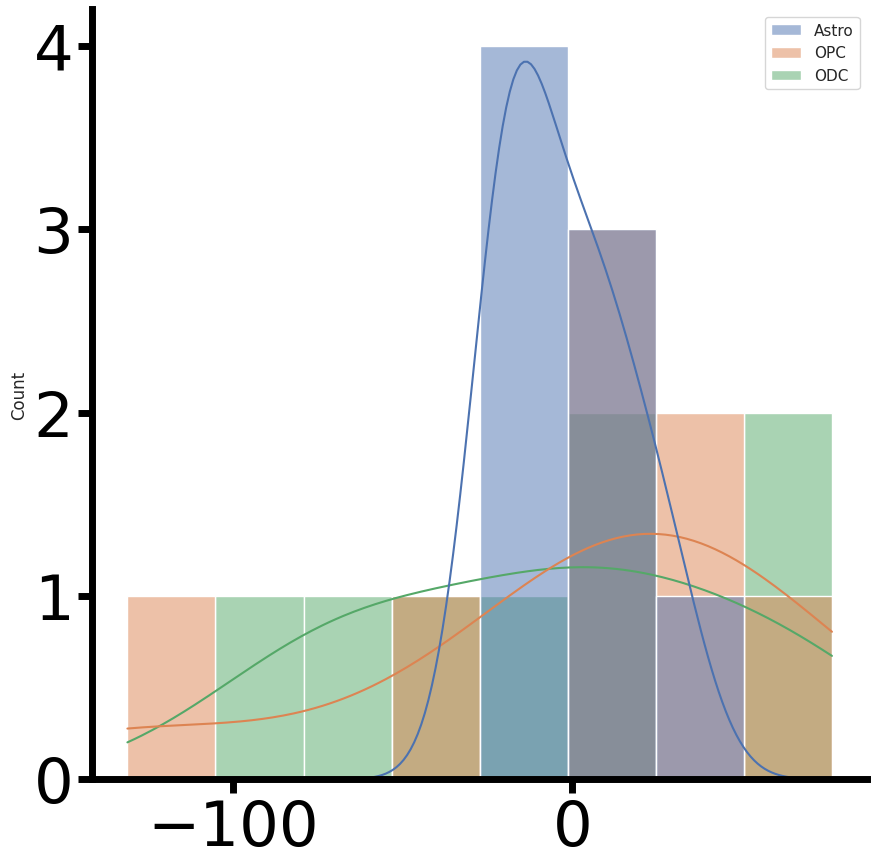

In [4]:
gene_name = 'PIP4K2A'
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name)), allow_pickle=True).item(),
}, 'expression_counts')
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name)), allow_pickle=True).item(),
}, 'volumes')
box(pd.DataFrame({
    'Astro': get_volumes('{}_Astro'.format(gene_name)),
    'OPC': get_volumes('{}_OPC'.format(gene_name)),
    'ODC': get_volumes('{}'.format(gene_name)),
}))

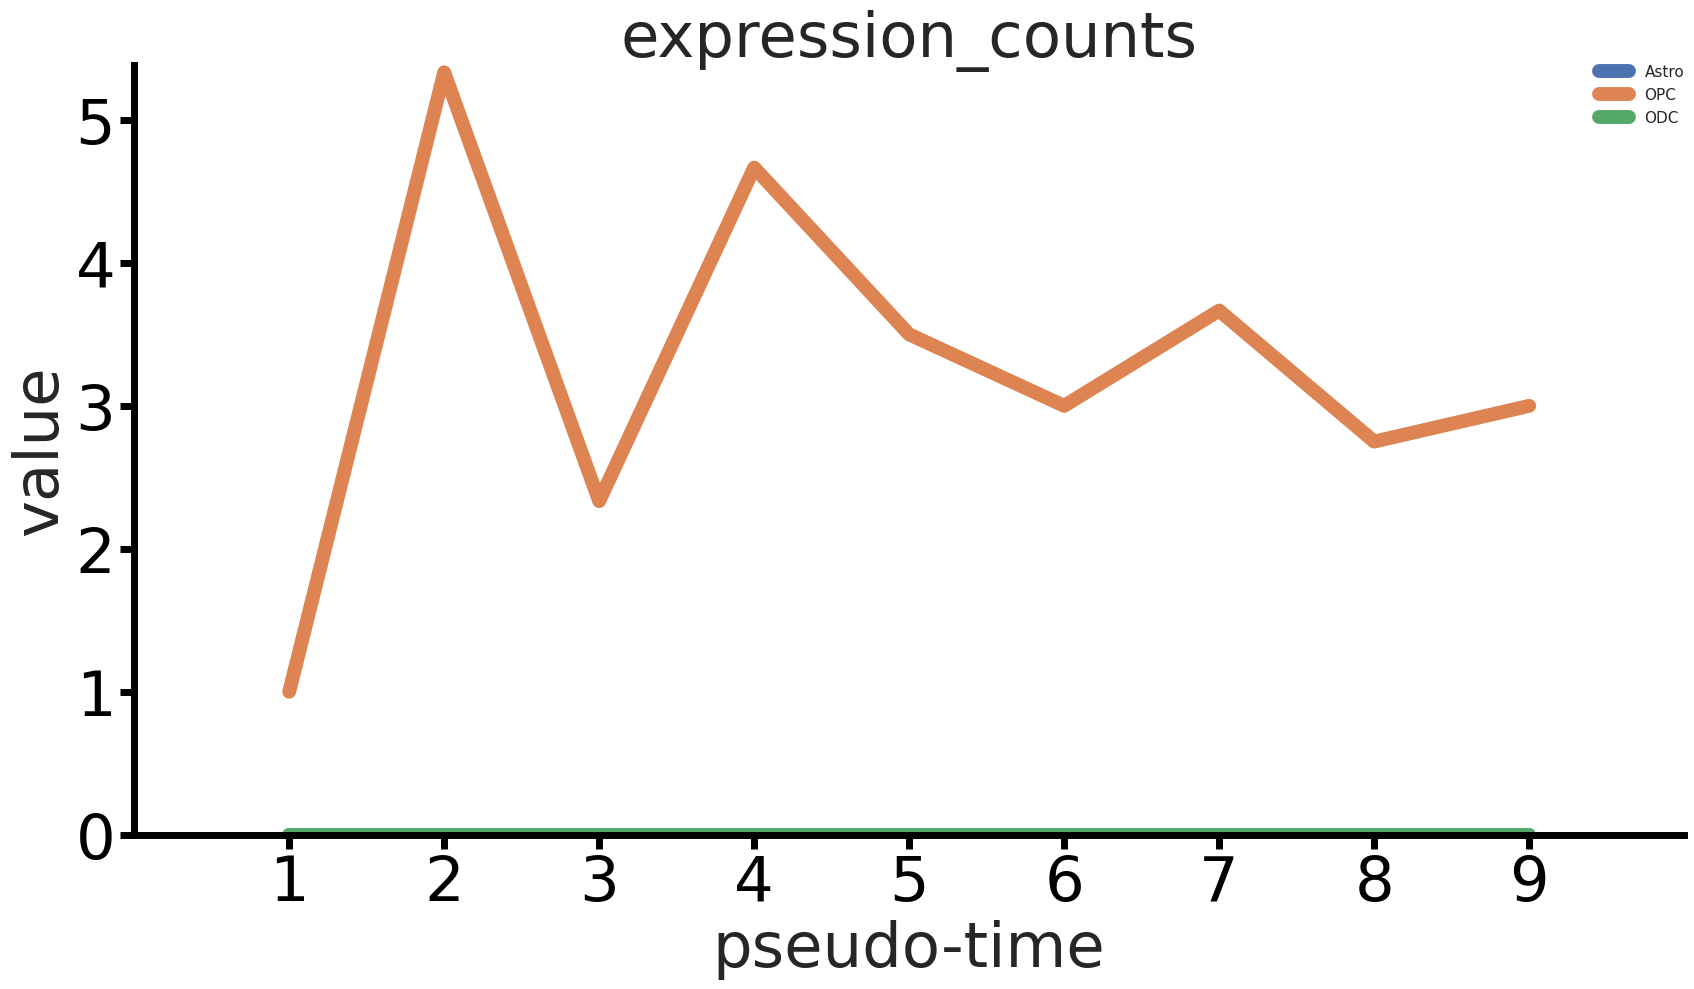

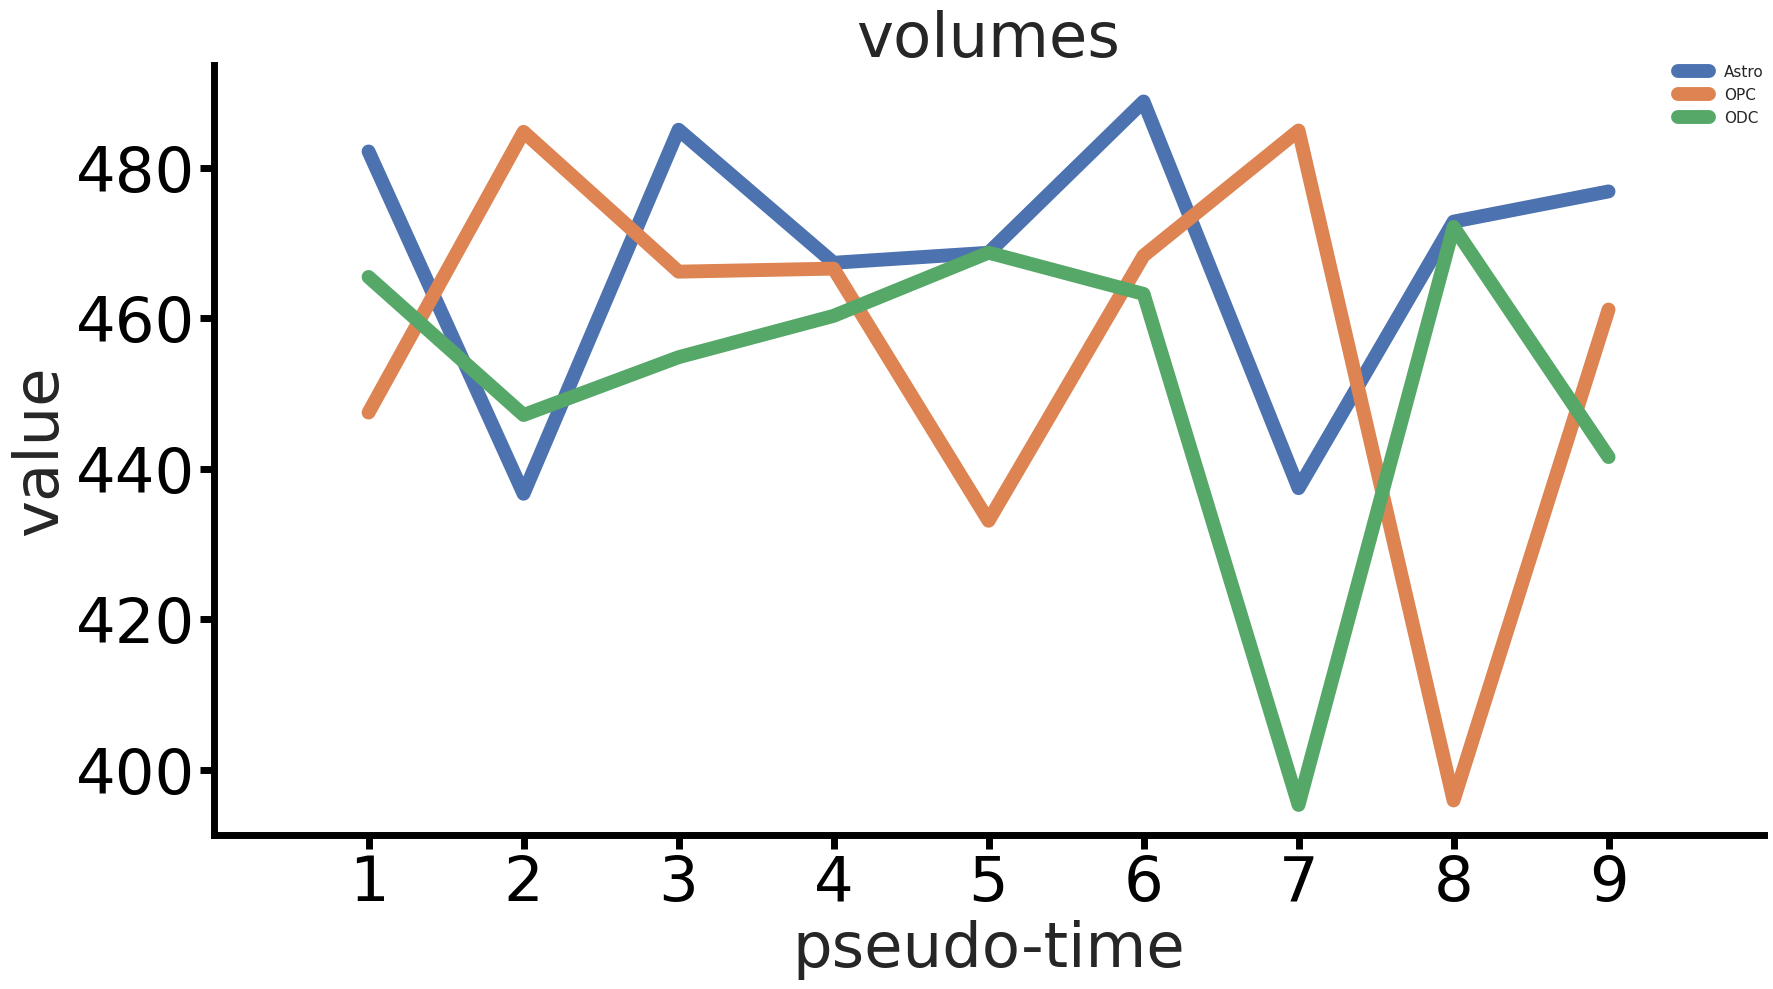

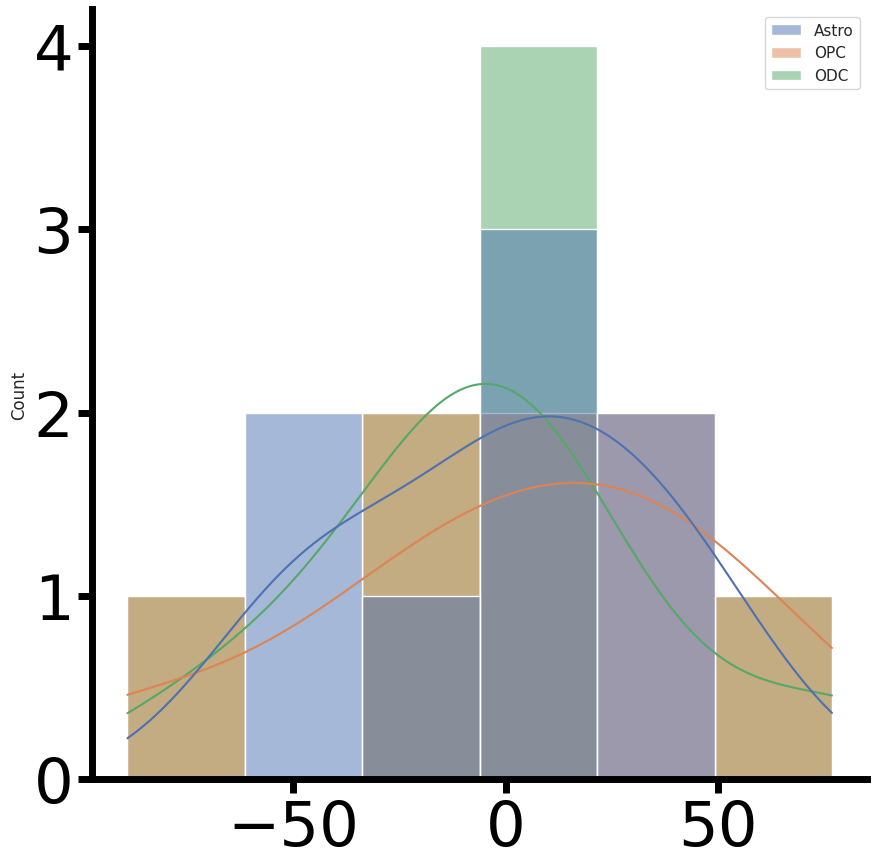

In [5]:
gene_name = 'PDGFRA'
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_ODC')), allow_pickle=True).item(),
}, 'expression_counts')
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_ODC')), allow_pickle=True).item(),
}, 'volumes')
box(pd.DataFrame({
    'Astro': get_volumes('{}_Astro'.format(gene_name)),
    'OPC': get_volumes('{}_OPC'.format(gene_name)),
    'ODC': get_volumes('{}_ODC'.format(gene_name)),
}))

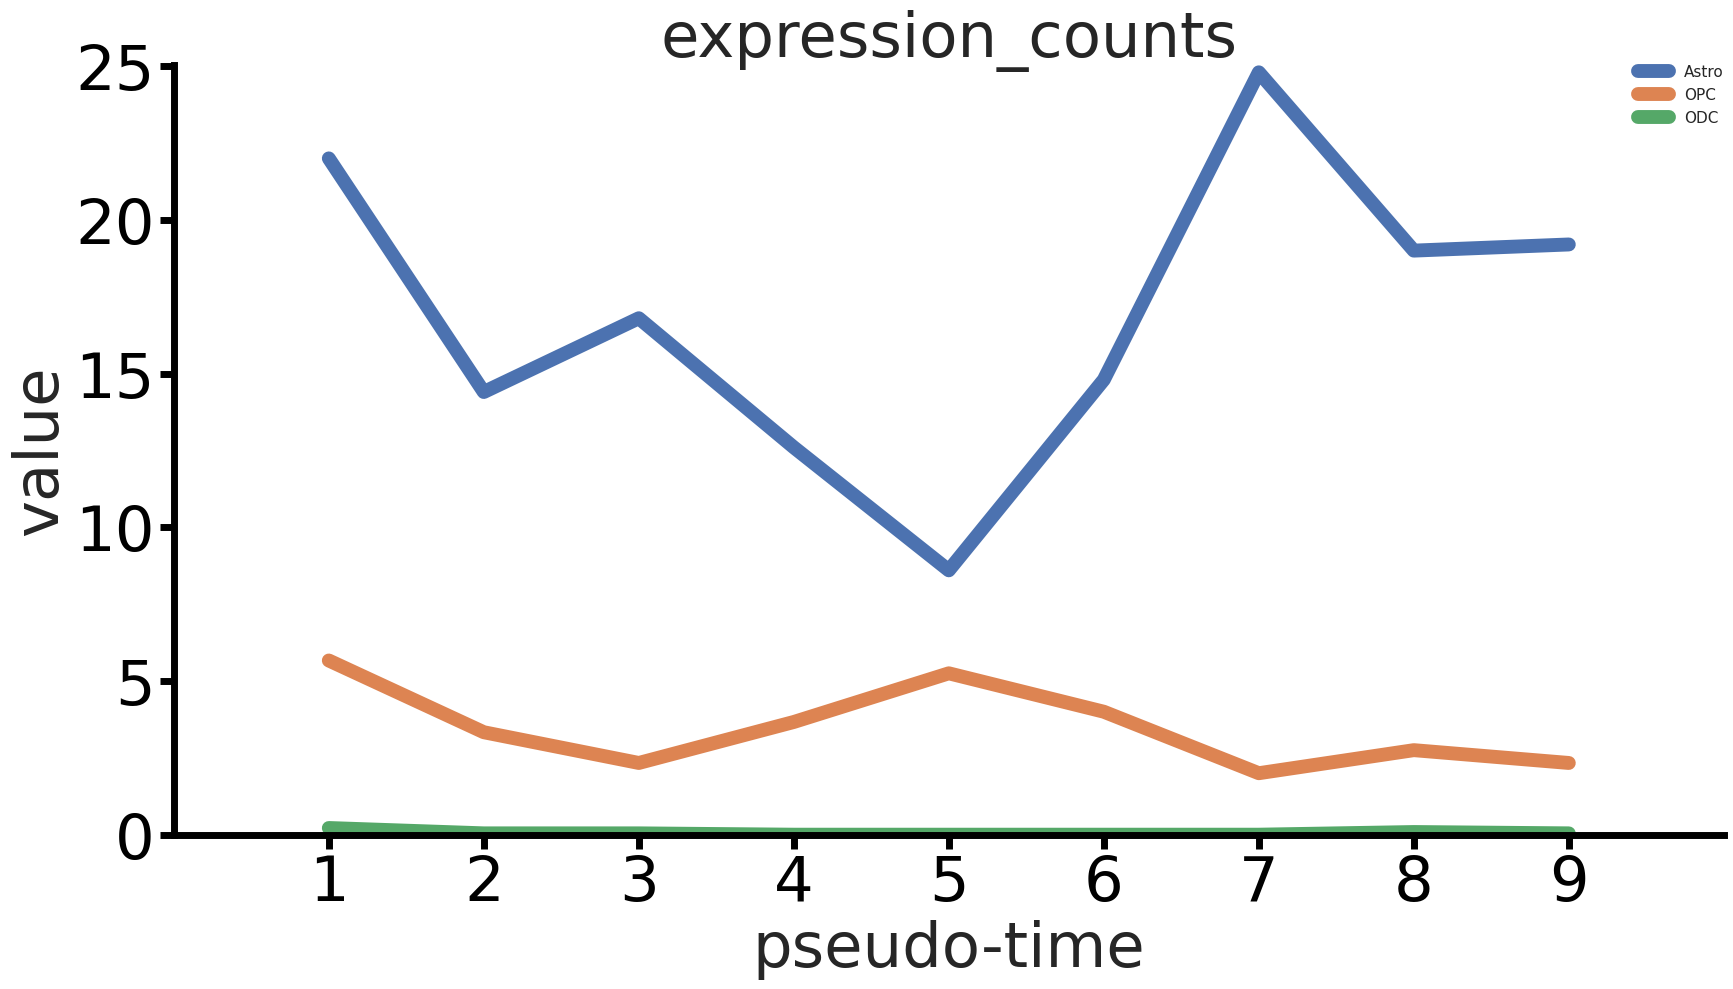

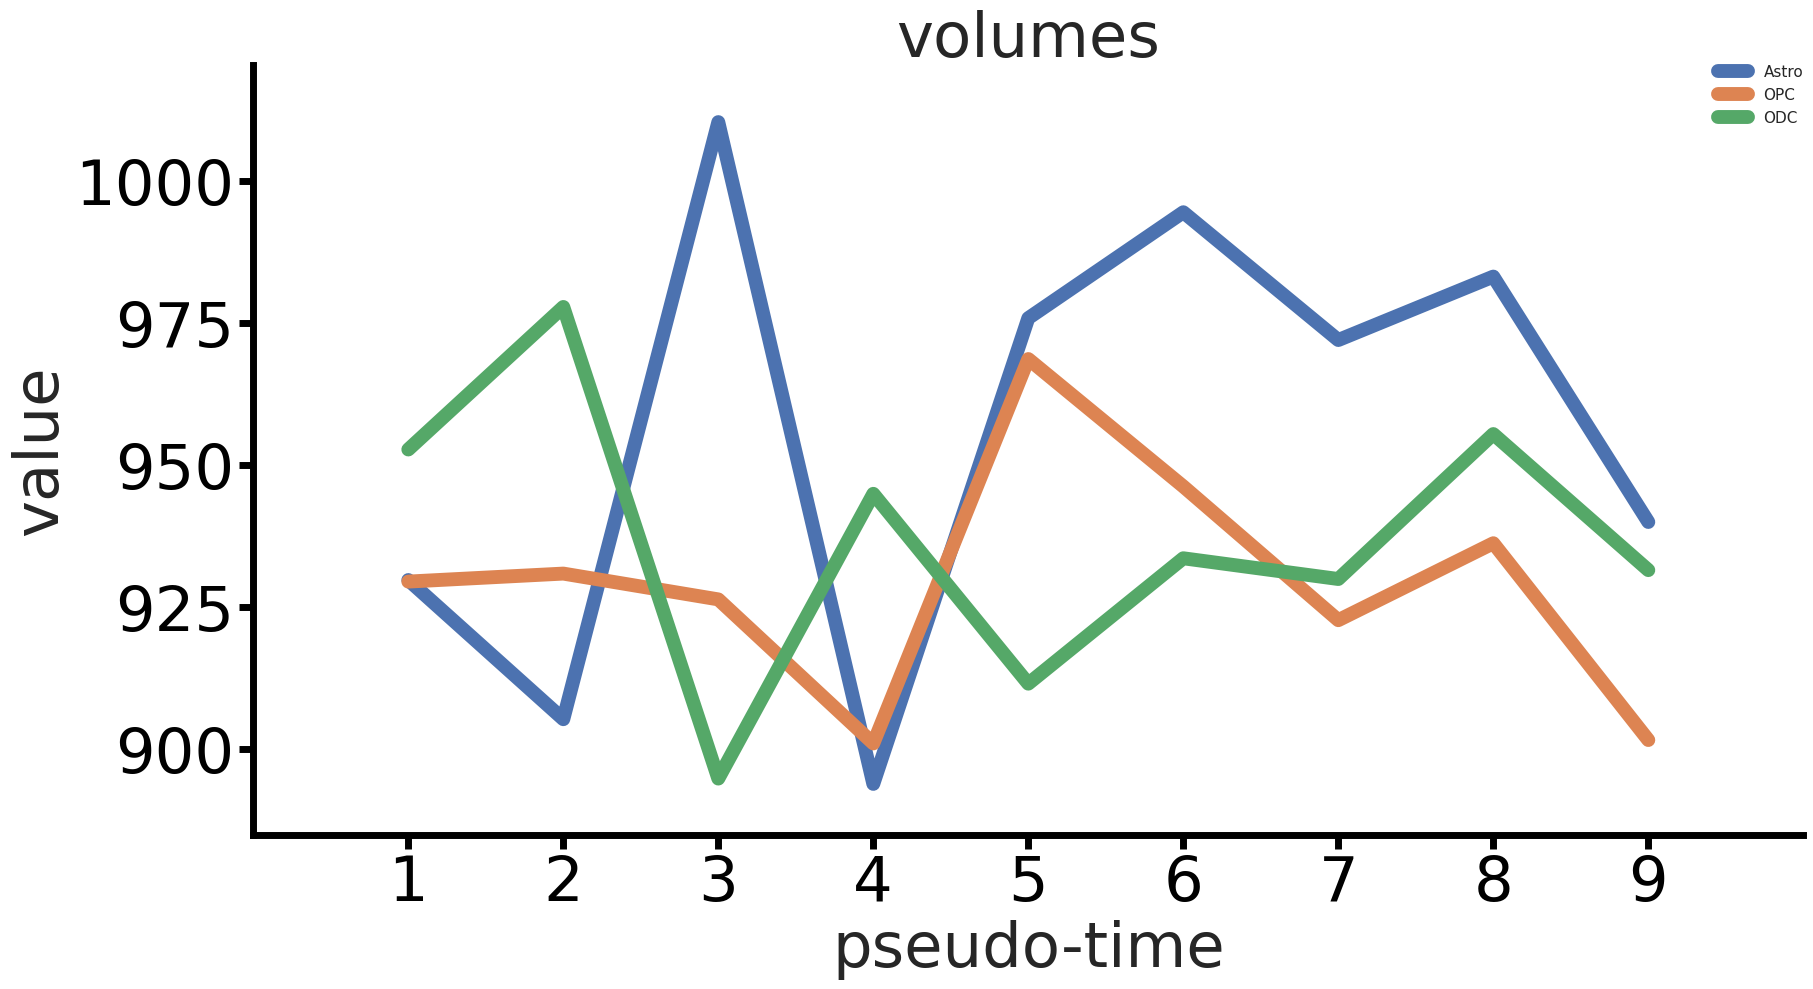

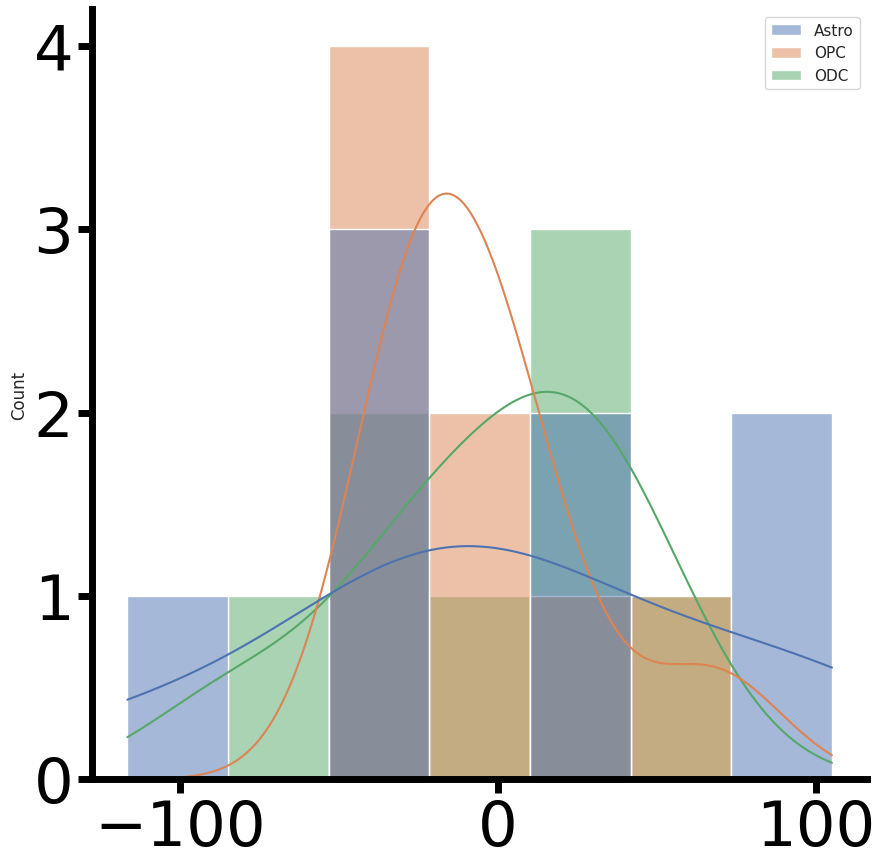

In [6]:
gene_name = 'SLC1A2'
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_ODC')), allow_pickle=True).item(),
}, 'expression_counts')
_draw({
    'Astro': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_Astro')), allow_pickle=True).item(),
    'OPC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_OPC')), allow_pickle=True).item(),
    'ODC': np.load(os.path.join("./temp", '{}.npy'.format(gene_name+'_ODC')), allow_pickle=True).item(),
}, 'volumes')
box(pd.DataFrame({
    'Astro': get_volumes('{}_Astro'.format(gene_name)),
    'OPC': get_volumes('{}_OPC'.format(gene_name)),
    'ODC': get_volumes('{}_ODC'.format(gene_name)),
}))